In [40]:
import pandas as pd 

data = pd.read_csv("./Automobile_data.csv")

data.tail(5)

symboling normalized-losses   make fuel-type aspiration num-of-doors  \
200         -1                95  volvo       gas        std         four   
201         -1                95  volvo       gas      turbo         four   
202         -1                95  volvo       gas        std         four   
203         -1                95  volvo    diesel      turbo         four   
204         -1                95  volvo       gas      turbo         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
200      sedan          rwd           front       109.1  ...          141   
201      sedan          rwd           front       109.1  ...          141   
202      sedan          rwd           front       109.1  ...          173   
203      sedan          rwd           front       109.1  ...          145   
204      sedan          rwd           front       109.1  ...          141   

     fuel-system  bore  stroke compression-ratio horsepower  peak-rpm  \
200         mpfi  3.78    3.15               9.5        114      5400   
201         mpfi  3.78    3.15               8.7        160      5300   
202         mpfi  3.58    2.87               8.8        134      5500   
203          idi  3.01     3.4              23.0        106      4800   
204         mpfi  3.78    3.15               9.5        114      5400   

    city-mpg highway-mpg  price  
200       23          28  16845  
201       19          25  19045  
202       18          23  21485  
203       26          27  22470  
204       19          25  22625  

[5 rows x 26 columns]

In [41]:
numerical_features = ['symboling', 'normalized-losses', 'wheel-base', 'engine-size',
                      'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [42]:
# Start by checking basic statistics of numerical features to understand the central tendency, dispersion, and shape of the distribution.
print(data.describe())


        symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    

[[<AxesSubplot:title={'center':'symboling'}>
  <AxesSubplot:title={'center':'wheel-base'}>
  <AxesSubplot:title={'center':'length'}>]
 [<AxesSubplot:title={'center':'width'}>
  <AxesSubplot:title={'center':'height'}>
  <AxesSubplot:title={'center':'curb-weight'}>]
 [<AxesSubplot:title={'center':'engine-size'}>
  <AxesSubplot:title={'center':'compression-ratio'}>
  <AxesSubplot:title={'center':'city-mpg'}>]
 [<AxesSubplot:title={'center':'highway-mpg'}> <AxesSubplot:>
  <AxesSubplot:>]]


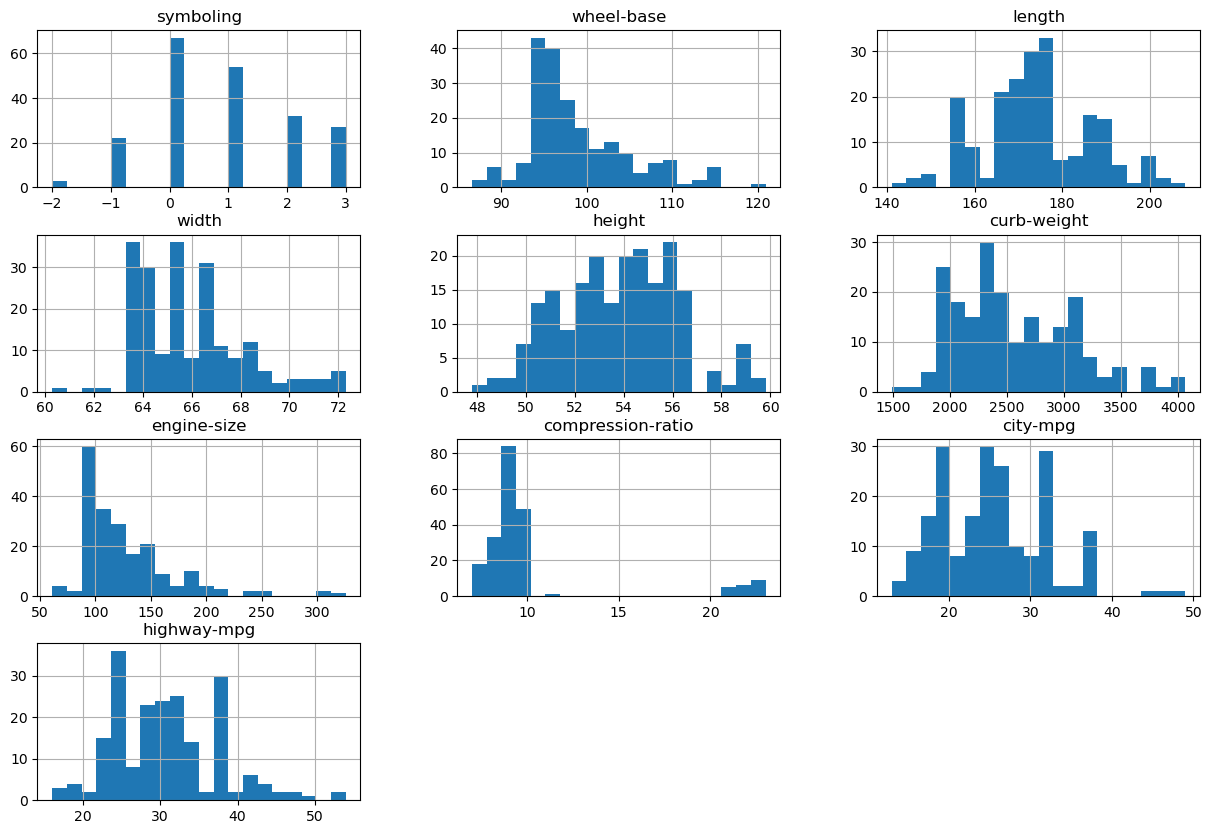

In [43]:
# Visualize the distribution of numerical features to identify patterns and potential outliers.
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
print(data.hist(bins=20, figsize=(15, 10)))
plt.show()

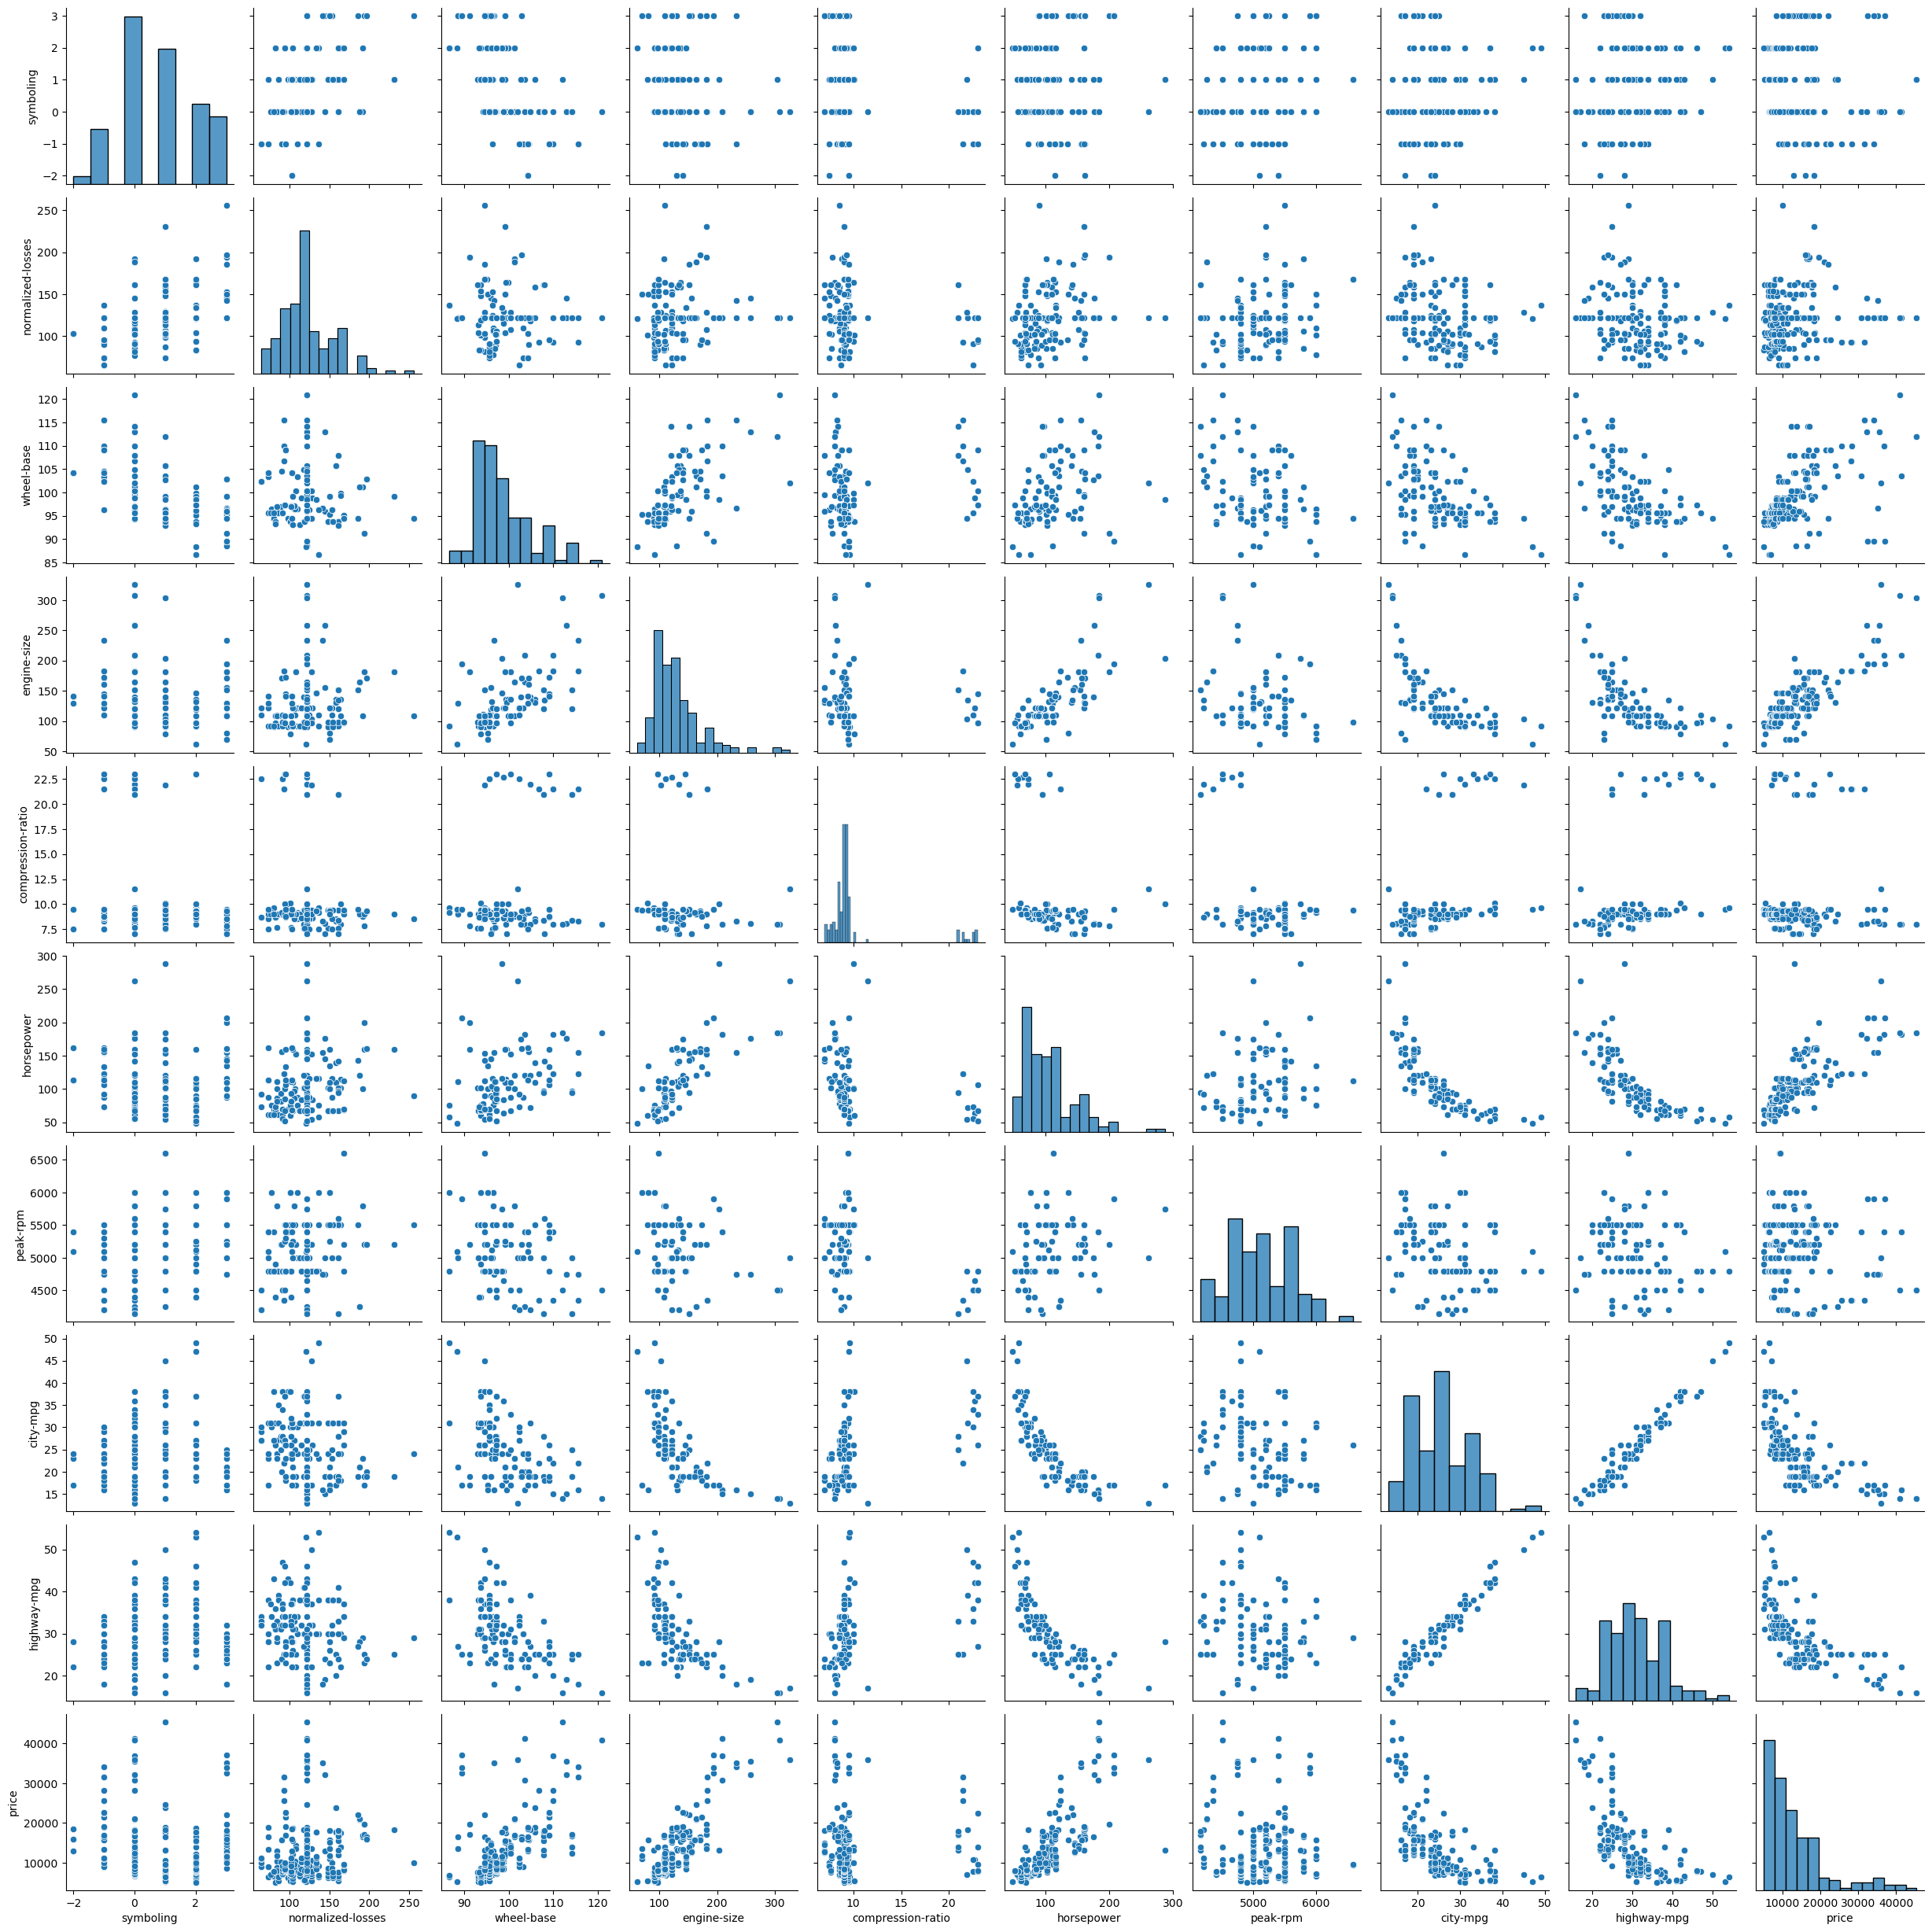

In [44]:
# Create a pair plot for selected numerical features to visualize relationships and distributions.
sns.pairplot(localData[numerical_features])
plt.show()

                   symboling  normalized-losses  make  fuel-type  aspiration  \
symboling           1.000000           0.528667   NaN        NaN         NaN   
normalized-losses   0.528667           1.000000   NaN        NaN         NaN   
make                     NaN                NaN   NaN        NaN         NaN   
fuel-type                NaN                NaN   NaN        NaN         NaN   
aspiration               NaN                NaN   NaN        NaN         NaN   
num-of-doors             NaN                NaN   NaN        NaN         NaN   
body-style               NaN                NaN   NaN        NaN         NaN   
drive-wheels             NaN                NaN   NaN        NaN         NaN   
engine-location          NaN                NaN   NaN        NaN         NaN   
wheel-base         -0.531954          -0.074362   NaN        NaN         NaN   
length             -0.357612           0.023220   NaN        NaN         NaN   
width              -0.232919           0

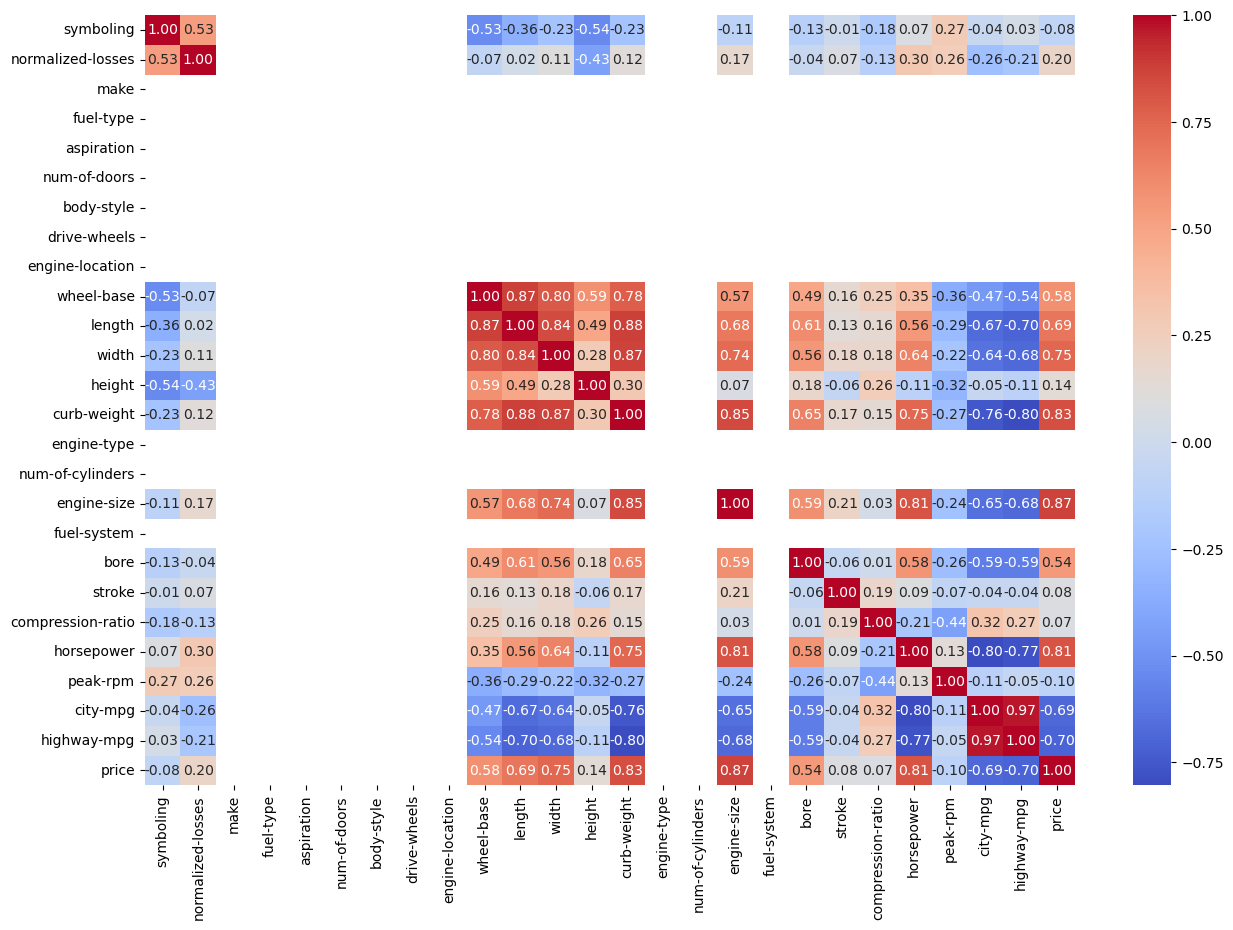

In [45]:
import numpy as np

# Explore the correlation between numerical features to identify relationships.
localData = data.copy()
localData.replace('?', np.nan, inplace=True)
localData = localData.apply(pd.to_numeric, errors='coerce')

# Compute pairwise correlation matrix
correlation_matrix = localData.corr()

print(correlation_matrix)

# метод Distance Correlation
# Plot heatmap of correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
# Correlation:

# Correlation measures the statistical association between two variables.
# The values range from -1 to 1:
# 1 indicates a perfect positive correlation (as one variable increases, the other increases proportionally).
# -1 indicates a perfect negative correlation (as one variable increases, the other decreases proportionally).

# 0 indicates no correlation.
#import seaborn as sns
#import matplotlib.pyplot as plt

#localData = data.copy()
#localData.replace('?', np.nan, inplace=True)

# Clean 'price' column by removing non-numeric characters
#localData['price'] = localData['price'].replace('[\$,]', '', regex=True).astype(float)

#localData = localData.dropna(subset=['price'])

#plt.figure(figsize=(15, 10))
#sns.violinplot(x='fuel-type', y='price', data=localData, hue='fuel-type', split=False)
#plt.show()

# Explore potential outliers using box plots or statistical methods.
# plt.figure(figsize=(15, 10))
# sns.violinplot(localData['price'])
# plt.show()

In [46]:
# Understand the distribution of categorical variables.
for column in localData.select_dtypes(include=['object']).columns:
    print(localData[column].value_counts())

In [48]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import f_regression, SelectKBest

# Замінити "?" на NaN
localData = data.copy()
localData.replace('?', np.nan, inplace=True)

# Перетворити об'єктні колонки на числові (якщо можливо)
localData = localData.apply(pd.to_numeric, errors='ignore')

# Замінити NaN на середнє значення відповідної колонки
for column in localData.columns:
    if localData[column].dtype == 'float64' or localData[column].dtype == 'int64':
        localData[column].fillna(localData[column].mean(), inplace=True)

# Отримати one-hot encoding для категоріальних ознак
localData_encoded = pd.get_dummies(localData, columns=['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'])

# Припустимо, що ваш датафрейм називається df
# Замініть 'your_target_column' на назву стовпця, який є вашою цільовою змінною
X = localData_encoded.drop('price', axis=1).values
y = localData_encoded['price'].values

# Розділіть дані на тренувальний та тестовий набори
train_set = X[:150, :]
test_set = X[150:, :]
train_y = y[:150]

# Використовуйте вбудовану функцію f_regression для відбору кращих ознак
selector = SelectKBest(f_regression, k=2)  # k - кількість найкращих ознак для вибору
selector.fit(train_set, train_y)  # підганяємо модель на тренувальному наборі
transformed_train = selector.transform(train_set)  # трансформуємо тренувальний набір
selected_features_indices = selector.get_support(indices=True)  # індекси вибраних ознак

# Виведемо інформацію про вибрані ознаки
print("Selected Features Indices:", selected_features_indices)
print("Selected Features Names:", localData_encoded.columns[selected_features_indices])
print("Scores of Features:", np.nan_to_num(selector.scores_))



Selected Features Indices: [6 7]
Selected Features Names: Index(['curb-weight', 'engine-size'], dtype='object')
Scores of Features: [4.24962790e-01 2.79899415e+00 7.20271180e+01 1.29454256e+02
 1.57482744e+02 4.12967998e+00 3.08583729e+02 4.73655534e+02
 6.20904809e+01 1.21129454e+00 2.85611662e+00 2.06752881e+02
 6.36065358e+00 1.15925657e+02 1.37508196e+02 1.13716298e-01
 1.10344993e+00 1.87876517e+01 2.46738588e+00 4.52486681e+00
 6.10662864e+00 4.05231315e-01 1.94984929e+01 2.53082113e+00
 6.12082187e+01 9.51310324e-02 3.97496852e+00 3.13347803e+00
 4.37095219e-01 3.34186431e+00 1.43842251e+01 4.70397368e-01
 1.62753544e-01 4.86970845e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.84674890e+00 4.84674890e+00 2.19551805e+00
 2.19551805e+00 3.56336038e-01 1.96149287e-01 7.72016398e+00
 1.91481832e+01 1.67496484e+01 3.61175332e+00 5.85544787e-01
 6.49898378e-01 1.02025977e+02 1.31663090e+02 1.93460495e+01
 1.93460495e+01 6.30087259e+00 4.76344570e-03 1.13632618e-01
 1.66541317e+0

C:\Users\annas\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [49]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression, SelectKBest

# Замінити "?" на NaN
localData = data.copy()
localData.replace('?', np.nan, inplace=True)

# Перетворити об'єктні колонки на числові (якщо можливо)
localData = localData.apply(pd.to_numeric, errors='ignore')

# Замінити NaN на середнє значення відповідної колонки
for column in localData.columns:
    if localData[column].dtype == 'float64' or localData[column].dtype == 'int64':
        localData[column].fillna(localData[column].mean(), inplace=True)

# Отримати one-hot encoding для категоріальних ознак
localData_encoded = pd.get_dummies(localData, columns=['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'])

# Замініть 'price' на вашу цільову змінну
X = localData_encoded.drop('price', axis=1).values
y = localData_encoded['price'].values

# Створіть функцію для взаємної інформації (MI)
def udf_MI(X, y):
    result = mutual_info_regression(X, y, n_neighbors=5)  # встановіть кількість сусідів за потребою
    return result

# Використовуйте вбудовану функцію SelectKBest для відбору кращих ознак
selector = SelectKBest(udf_MI, k=2)  # k - кількість найкращих ознак для вибору
selector.fit(X, y)  # підганяємо модель
selected_features_indices = selector.get_support(indices=True)  # індекси вибраних ознак

# Виведемо інформацію про вибрані ознаки
print("Selected Features Indices:", selected_features_indices)
print("Selected Features Names:", localData_encoded.columns[selected_features_indices])
print("Scores of Features:", selector.scores_)


Selected Features Indices: [ 6 14]
Selected Features Names: Index(['curb-weight', 'highway-mpg'], dtype='object')
Scores of Features: [1.56054523e-01 1.70025119e-01 4.55061570e-01 5.46653525e-01
 6.02822116e-01 2.35123457e-01 8.83143616e-01 7.56993706e-01
 3.99293273e-01 2.94384579e-01 6.62700205e-02 7.67934433e-01
 1.39110107e-01 7.10004745e-01 8.13316173e-01 1.71676408e-03
 3.35895098e-02 3.46439326e-02 9.03755951e-04 1.29850688e-02
 3.84436002e-02 0.00000000e+00 0.00000000e+00 1.12393038e-02
 9.35789182e-02 0.00000000e+00 9.82190396e-03 2.15699019e-02
 5.22804229e-02 1.28832575e-02 0.00000000e+00 9.51697752e-04
 1.60682137e-02 3.10665117e-02 1.32427168e-02 1.68420510e-02
 5.55783997e-02 1.02305570e-02 1.02305570e-02 7.24323821e-02
 7.24323821e-02 1.32870094e-02 9.72084867e-03 3.58744805e-03
 0.00000000e+00 8.25089154e-02 4.18194262e-02 2.43571599e-02
 8.95198137e-03 2.76819979e-01 2.92139154e-01 0.00000000e+00
 0.00000000e+00 3.33050658e-02 8.88178420e-16 4.61758207e-02
 8.95304848e

In [50]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest

# Замінити "?" на NaN
localData = data.copy()
localData.replace('?', np.nan, inplace=True)

# Перетворити об'єктні колонки на числові (якщо можливо)
localData = localData.apply(pd.to_numeric, errors='ignore')

# Замінити NaN на середнє значення відповідної колонки
for column in localData.columns:
    if localData[column].dtype == 'float64' or localData[column].dtype == 'int64':
        localData[column].fillna(localData[column].mean(), inplace=True)

# Отримати one-hot encoding для категоріальних ознак
localData_encoded = pd.get_dummies(localData, columns=['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'])

# Замініть 'price' на назву стовпця, який є вашою цільовою змінною
X = localData_encoded.drop('symboling', axis=1).values
y = localData_encoded['symboling'].values

# Розділіть дані на тренувальний та тестовий набори
train_set = X[:150, :]
test_set = X[150:, :]
train_y = y[:150]

from sklearn.preprocessing import MinMaxScaler

# Масштабуємо дані в інтервал від 0 до 1
scaler = MinMaxScaler()
train_set_scaled = scaler.fit_transform(train_set)

# Використовуйте вбудовану функцію chi2 для відбору кращих ознак
selector = SelectKBest(chi2, k=2)
selector.fit(train_set_scaled, train_y)
transformed_train = selector.transform(train_set_scaled)
selected_features_indices = selector.get_support(indices=True)

# Виведемо інформацію про вибрані ознаки
print("Selected Features Indices:", selected_features_indices)
print("Selected Features Names:", localData_encoded.columns[selected_features_indices])
print("Scores of Features:", selector.scores_)


Selected Features Indices: [24 42]
Selected Features Names: Index(['make_mazda', 'num-of-doors_four'], dtype='object')
Scores of Features: [ 1.62658939  5.45219979  3.1706397   1.68357442  5.42992238  4.6570107
  2.47973733  2.89062523  0.28030511  4.70609481  3.23952126  2.32299458
  3.89031789  3.24852857  5.13715188  6.75948196  7.6505448   5.88577828
  1.62133466 11.48147659  3.82722217  1.54933433  5.33333333  4.21945911
 37.46018531  2.19148936 10.58373162  5.476393   19.55555556  8.3910778
 16.50786309  3.33625731 15.62471396 12.67105263         nan         nan
         nan 19.15220083  1.66540877  1.74631356  7.28634278 30.4970631
 34.07148277 22.08695652  2.9901921  25.9849284  17.08585267 15.80539166
  7.43191312 10.85138499 17.7000331   0.33806566 16.56521739  6.95025002
  2.19148936 16.667154    8.97034735  8.64988558  2.85767269 22.08695652
  3.69880916 16.42706056  2.64669776  8.08581446  6.89473684  1.77777778
 22.08695652  3.57294106 17.77332416 16.56521739 19.15220083 

In [51]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import chi2, f_regression, mutual_info_regression, SelectKBest
from minepy import MINE
from sklearn.preprocessing import MinMaxScaler

# Замінити "?" на NaN
localData = data.copy()
localData.replace('?', np.nan, inplace=True)

# Перетворити об'єктні колонки на числові (якщо можливо)
localData = localData.apply(pd.to_numeric, errors='ignore')

# Замінити NaN на середнє значення відповідної колонки
for column in localData.columns:
    if localData[column].dtype == 'float64' or localData[column].dtype == 'int64':
        localData[column].fillna(localData[column].mean(), inplace=True)

# Отримати one-hot encoding для категоріальних ознак
localData_encoded = pd.get_dummies(localData, columns=['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'])

# Замініть 'symboling' на назву стовпця, який є вашою цільовою змінною
X = localData_encoded.drop('symboling', axis=1).values
y = localData_encoded['symboling'].values

# Розділіть дані на тренувальний та тестовий набори
train_set = X[:150, :]
test_set = X[150:, :]
train_y = y[:150]

# Масштабуємо дані в інтервал від 0 до 1
scaler = MinMaxScaler()
train_set_scaled = scaler.fit_transform(train_set)

# Визначаємо метод MINE для distance correlation
def mic(x, y):
    m = MINE()
    m.compute_score(x, y)
    return m.mic()

# Використовуйте метод Distance Correlation
distance_corr_scores = [mic(train_set_scaled[:, i], train_y) for i in range(train_set_scaled.shape[1])]

# Використовуйте метод f_regression
f_regression_scores, _ = f_regression(train_set_scaled, train_y)

# Використовуйте метод Mutual Information
mutual_info_scores = [mutual_info_regression(train_set_scaled[:, i].reshape(-1, 1), train_y) for i in range(train_set_scaled.shape[1])]

# Використовуйте метод Chi-squared Statistics
chi2_scores, _ = chi2(train_set_scaled, train_y)

# Створимо результуючий ранжирований датафрейм
result_df = pd.DataFrame({
    'Distance Correlation': distance_corr_scores,
    'f_regression': f_regression_scores,
    'Mutual Information': mutual_info_scores,
    'Chi-squared Statistics': chi2_scores
}, index=localData_encoded.drop('symboling', axis=1).columns)  # Виключимо цільову змінну

# Використайте iloc для визначення індексів колонок для сортування
sorted_columns = result_df.mean(axis=1).sort_values(ascending=False).index
result_df = result_df.loc[sorted_columns]

# Виведемо ранжирований датафрейм
print(result_df)


C:\Users\annas\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


                      Distance Correlation  f_regression  \
num-of-doors_two                  0.384014    103.055172   
num-of-doors_four                 0.371306     96.744487   
height                            0.522722     72.649362   
body-style_hatchback              0.224095     49.687255   
wheel-base                        0.626518     57.830820   
...                                    ...           ...   
make_isuzu                        0.010890      0.166949   
make_chevrolet                    0.009321      0.000939   
make_volvo                        0.000000           NaN   
make_toyota                       0.000000           NaN   
make_volkswagen                   0.000000           NaN   

                          Mutual Information  Chi-squared Statistics  
num-of-doors_two        [0.2703320196231904]               34.071483  
num-of-doors_four      [0.36425956177495467]               30.497063  
height                 [0.48705972015157384]                5.4299

In [ ]:
# !conda install -c conda-forge minepy

In [25]:
# !pip install minepy


  Using cached minepy-1.2.6.tar.gz (496 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minepy: filename=minepy-1.2.6-cp39-cp39-win_amd64.whl size=46622 sha256=eaff631a8beb15ae7fd4c3caf412ccc2dd5fa3d504a9d9e674fdbd9f50be5e75
  Stored in directory: c:\users\annas\appdata\local\pip\cache\wheels\36\71\63\ac6efc0d0f43ad93398a7b25b6ef3b3aacf109e7dc5afe588f
Successfully built minepy


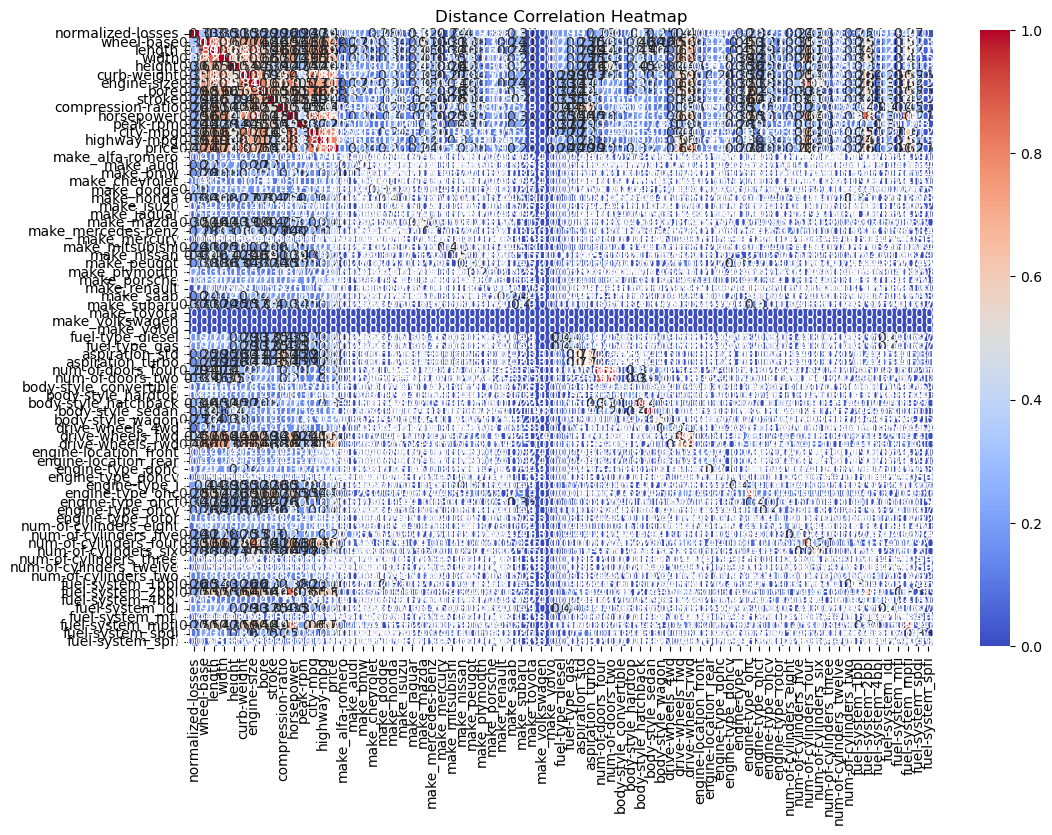

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Визначте distance correlation між ознаками
distance_corr_matrix = np.zeros((train_set_scaled.shape[1], train_set_scaled.shape[1]))

for i in range(train_set_scaled.shape[1]):
    for j in range(train_set_scaled.shape[1]):
        distance_corr_matrix[i, j] = mic(train_set_scaled[:, i], train_set_scaled[:, j])

# Створіть heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(distance_corr_matrix, annot=True, cmap='coolwarm', xticklabels=localData_encoded.drop('symboling', axis=1).columns,
            yticklabels=localData_encoded.drop('symboling', axis=1).columns)
plt.title('Distance Correlation Heatmap')
plt.show()



C:\Users\annas\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\annas\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


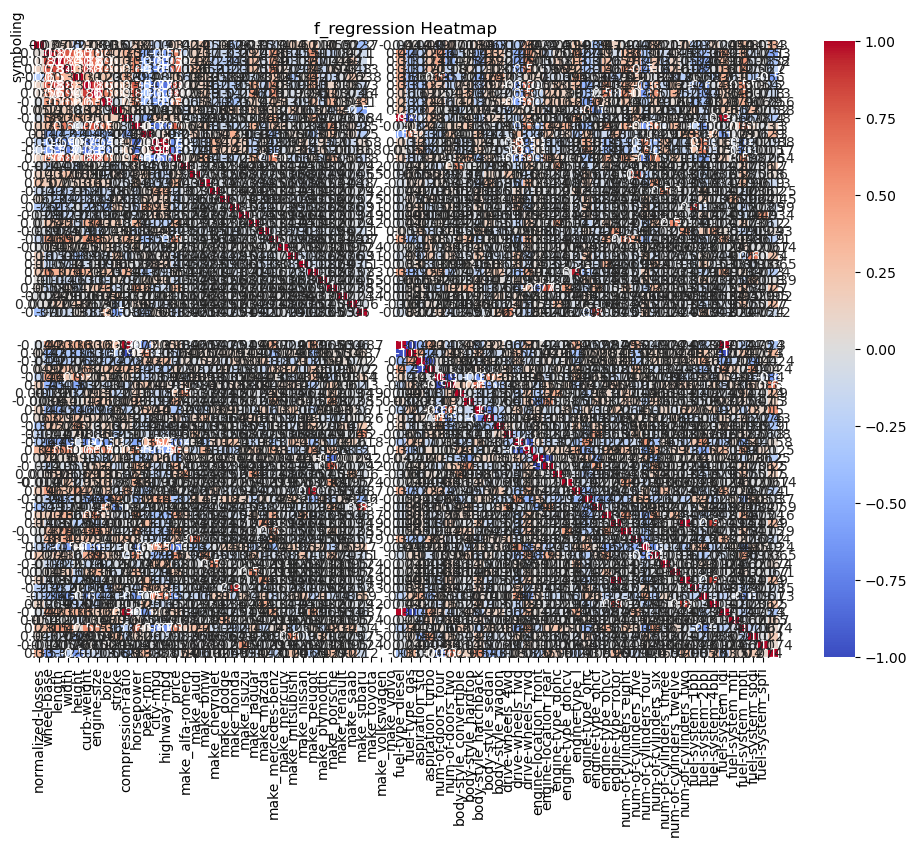

In [33]:
# Визначте f_regression між ознаками
f_regression_matrix = np.corrcoef(train_set_scaled.T, train_y)

# Створіть heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(f_regression_matrix, annot=True, cmap='coolwarm', xticklabels=localData_encoded.drop('symboling', axis=1).columns,
            yticklabels=['symboling'])
plt.title('f_regression Heatmap')
plt.show()


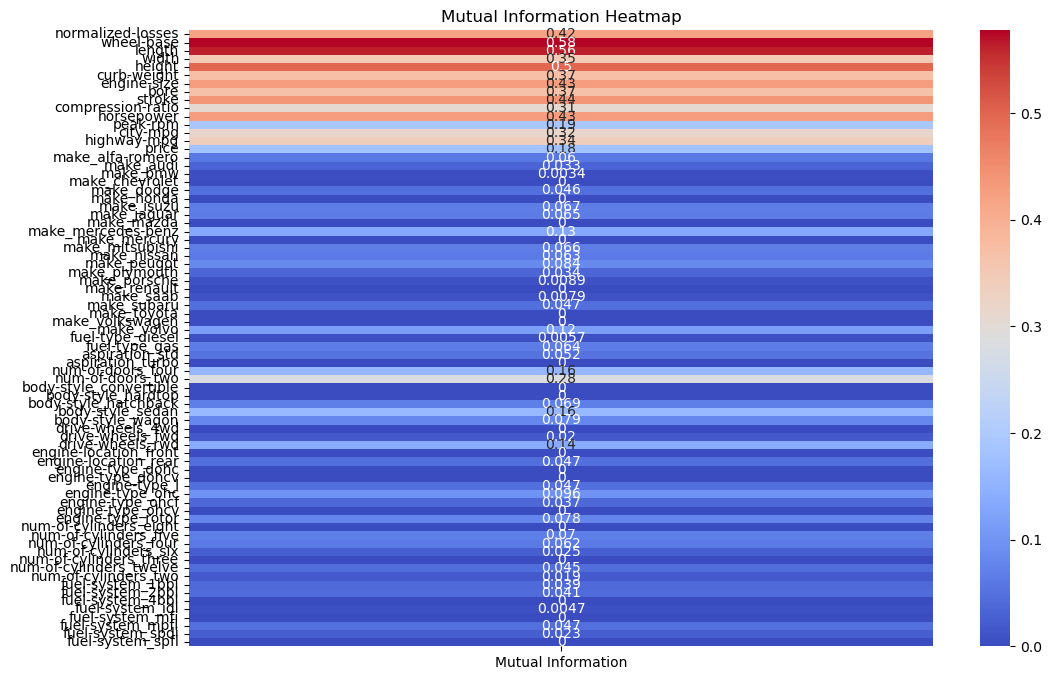

In [34]:
# Визначте mutual information між ознаками
mutual_info_matrix = np.zeros((train_set_scaled.shape[1], 1))

for i in range(train_set_scaled.shape[1]):
    mutual_info_matrix[i, 0] = mutual_info_regression(train_set_scaled[:, i].reshape(-1, 1), train_y)

# Створіть heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(mutual_info_matrix, annot=True, cmap='coolwarm', xticklabels=['Mutual Information'],
            yticklabels=localData_encoded.drop('symboling', axis=1).columns)
plt.title('Mutual Information Heatmap')
plt.show()


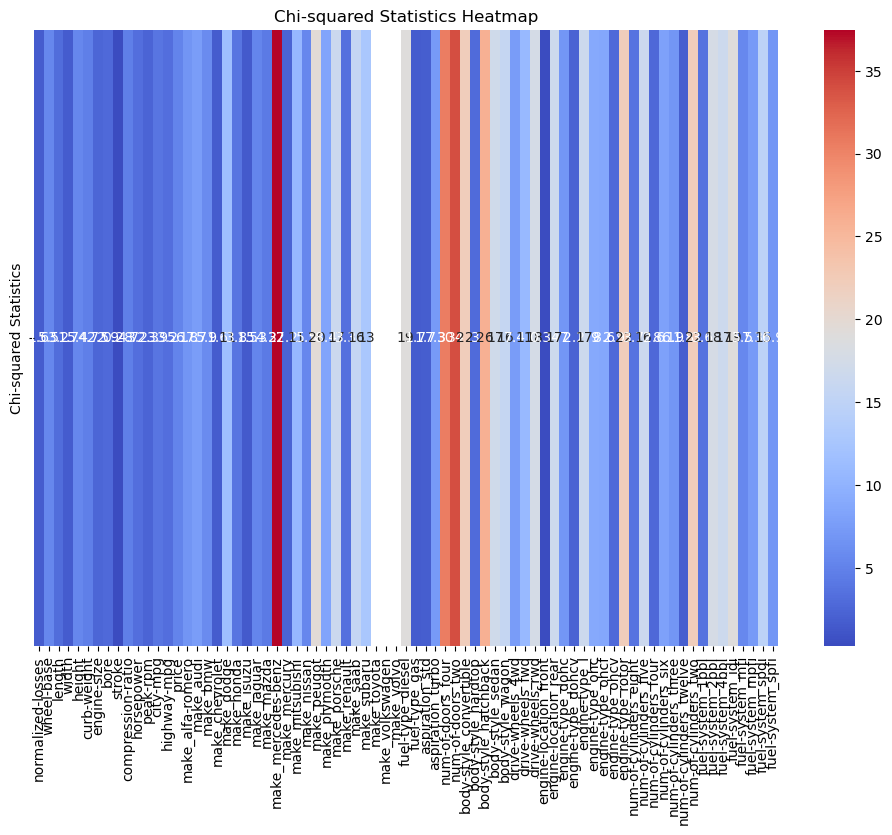

In [39]:
# Визначте chi2 між ознаками
chi2_matrix, _ = chi2(train_set_scaled, train_y)

# Створіть heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(chi2_matrix.reshape(1, -1), annot=True, cmap='coolwarm', xticklabels=localData_encoded.drop('symboling', axis=1).columns,
            yticklabels=['Chi-squared Statistics'])
plt.title('Chi-squared Statistics Heatmap')
plt.show()
